# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

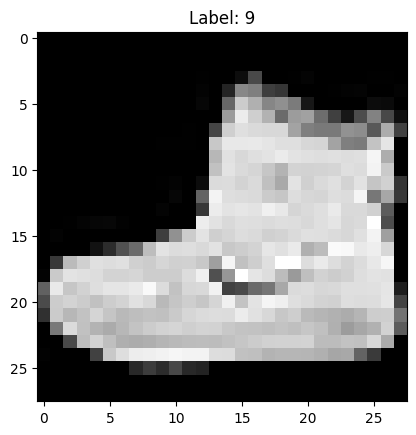

In [2]:
import matplotlib.pyplot as plt

index = 0

plt.imshow(x_train[index], cmap='gray')
plt.title(f'Label: {y_train[index]}')
plt.show()


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image=x_train[56]

In [8]:
single_image

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0, 152, 192,
        135, 134, 165, 209,  25,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  68, 178, 253, 230, 234,
        243, 244, 231, 223, 254, 207,  92,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 208, 239, 232, 219, 217, 218,
        210, 207, 210, 212, 216, 226, 234, 212,  31,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0, 104, 234, 210, 214, 216, 219, 211,
        224, 228, 225, 209, 214, 214, 206, 223, 212,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 205, 217, 216, 212, 216, 218, 212,
        222, 217, 219, 210, 215, 211, 208, 208, 230, 100,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 198, 233, 213, 219, 211, 216, 217, 212,
        227, 215, 220, 213, 214, 209, 206, 209, 224, 225,  22,   0,   0,
          0,   0],
       [  

In [9]:
single_image.shape

(28, 28)

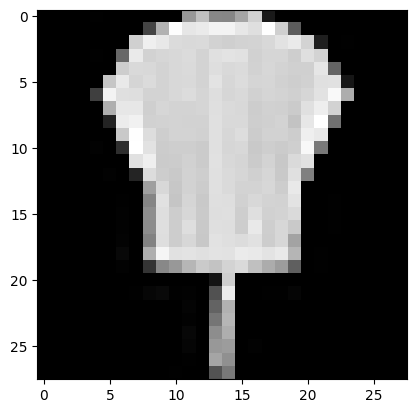

In [10]:
plt.imshow(single_image, cmap='gray')

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.** Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train.shape

(60000,)

In [16]:
y_example=to_categorical(y_train)

In [17]:
y_example

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_example.shape

(60000, 10)

In [19]:
y_cat_train=to_categorical(y_train,10)

In [20]:
y_cat_test=to_categorical(y_test,10)

In [23]:
single_image.max()

255

In [24]:
single_image.min()

0

In [25]:
x_train=x_train/255
x_test=x_test/255

In [26]:
scaled_image=x_train[0]


In [27]:
scaled_image.max()

1.0

In [28]:
scaled_image.min()

0.0

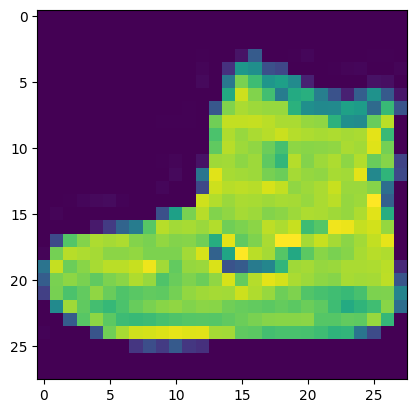

In [29]:
plt.imshow(scaled_image)

In [30]:
x_train.shape

(60000, 28, 28)

In [21]:
# Check the maximum pixel value in the original data
import numpy as np
max_pixel_value = np.max(x_train)

print(f"Maximum pixel value before normalization: {max_pixel_value}")




Maximum pixel value before normalization: 255


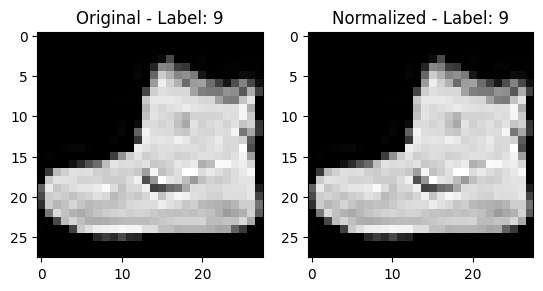

In [31]:
# Normalize the pixel values by dividing by the maximum pixel value
x_train_normalized = x_train / max_pixel_value
x_test_normalized = x_test / max_pixel_value

# Displaying the normalized image
index = 0  # You can change this index to view different images

plt.subplot(1, 2, 1)
plt.imshow(x_train[index], cmap='gray')
plt.title(f'Original - Label: {y_train[index]}')

plt.subplot(1, 2, 2)
plt.imshow(x_train_normalized[index], cmap='gray')
plt.title(f'Normalized - Label: {y_train[index]}')

plt.show()

In this code, I've divided both x_train and x_test by 255.0 to normalize the pixel values between 0 and 1. This ensures that the neural network receives inputs in a standardized range, which can help in training. The right side of the plot shows the normalized version of the image. Adjusting the index variable can help to visualize different images.

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [33]:
x_train = x_train.reshape(60000,28,28,1)

In [34]:
x_train.shape

(60000, 28, 28, 1)

In [35]:
x_test=x_test.reshape(10000,28,28,1)

In [36]:
x_test.shape

(10000, 28, 28, 1)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [40]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [52]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2387 - accuracy: 0.9131
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2095 - accuracy: 0.9229
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1888 - accuracy: 0.9323
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1704 - accuracy: 0.9388
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1543 - accuracy: 0.9451
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1407 - accuracy: 0.9494
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1294 - accuracy: 0.9531
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1190 - accuracy: 0.9582
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1080 - accuracy: 0.9624
Epoch 10/10
1875/1875 [==============================] - 31s 16m

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [53]:
model.metrics_names

['loss', 'accuracy']

In [54]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.3421 - accuracy: 0.9120


[0.3420866131782532, 0.9120000004768372]

In [55]:
from sklearn.metrics import classification_report

In [56]:
import numpy as np

In [57]:
predictions=model.predict(x_test)
prediction_classes=np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 5ms/step


In [58]:
report = classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.82      0.85      1000
           3       0.91      0.92      0.91      1000
           4       0.87      0.85      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.72      0.81      0.76      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Great Job!